In [1]:
# Assignment : DL Assignment 1 Question 2
# Group No. 82
# Mriganka Gayen
# Subodh Kant Mishra
# Ashutosh Sahebrao Dhok

In [2]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
# Reading the data from csv
df=pd.read_csv("data2_0.75_6.csv")
df.head()

,0.156326772,0.011856755,0
0,0.211109,0.032209,0
1,0.263386,0.060866,0
2,0.312221,0.097541,0
3,0.356707,0.141855,0
4,0.395976,0.193337,0


In [4]:
# Including the header for each row - feature 1, feature 2, class label.

df.columns = ["Feature_1", "Feature_2", "Class_Label"]
df.head()

,Feature_1,Feature_2,Class_Label
0,0.211109,0.032209,0
1,0.263386,0.060866,0
2,0.312221,0.097541,0
3,0.356707,0.141855,0
4,0.395976,0.193337,0


In [5]:
# a. Train two single/double hidden layer deep networks
# b. By varying the number of hidden nodes (4, 8, 12, 16) in each layer 
# c. with 70% training and 30% validation data. 
# d. Use appropriate learning rate, activation, and loss functions and also mention the reason for choosing the same. 
# e. Report, compare, and explain the observed accuracy and minimum loss achieved.

In [6]:
# Seperating the input variables and the output variables

X = df.drop("Class_Label",axis=1)
Y = df["Class_Label"]


In [7]:
# Splitting the dataset into 70% training and 30% validation data.

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [8]:
Xtrain_shape = Xtrain.shape[1]
print (Xtrain_shape)

2


In [9]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 1


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(4, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# layer 3 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 12)                108       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 1s 12ms/step - loss: 0.9270 - accuracy: 0.5072 - val_loss: 1.1120 - val_accuracy: 0.4933
Epoch 2/25
11/11 [==============================] - 0s 3ms/step - loss: 0.8189 - accuracy: 0.5072 - val_loss: 0.9568 - val_accuracy: 0.4933
Epoch 3/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7472 - accuracy: 0.5072 - val_loss: 0.8705 - val_accuracy: 0.4933
Epoch 4/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7181 - accuracy: 0.5072 - val_loss: 0.8225 - val_accuracy: 0.4933
Epoch 5/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7063 - accuracy: 0.5072 - val_loss: 0.7877 - val_accuracy: 0.4933
Epoch 6/25
11/11 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.5072 - val_loss: 0.7622 - val_accuracy: 0.4933
Epoch 7/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.5072 - val_loss: 0.7514 - val_accuracy: 0.4933
Epoch 8/25
11/11 [=

In [11]:
# plotting the training accuracy
def plot_history(h):
 
    plt.plot(h.history['val_accuracy'], label='validation accuracy')
    plt.plot(h.history['accuracy'], label='train accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')    
    plt.legend()
    plt.title("Plot of Accuracy")
    
    plt.show()

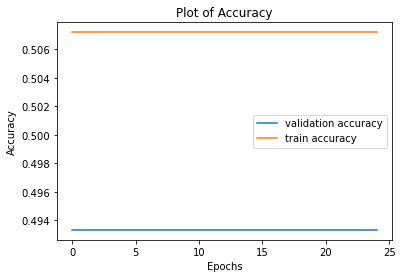

In [12]:
hist = plot_history(h)

In [13]:
# plotting the training accuracy
def plot_history(h):
    
    plt.plot(h.history['val_loss'], label='validation loss')
    plt.plot(h.history['loss'], label='train loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title("Plot of Loss")
    
    

    plt.show()

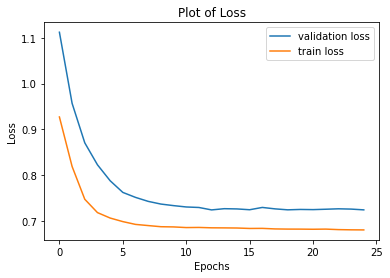

In [14]:
hist = plot_history(h)

In [15]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 2


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(4, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# Add dropout of 25% to layer 2
dnnModel.add(Dropout(0.25))
# layer 3 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# Add dropout of 25% to layer 3
dnnModel.add(Dropout(0.25))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 8)                 40        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_6 (Dense)             (None, 12)                108       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 13        
                                                                 
Total params: 173
Trainable params: 173
Non-trainable 

In [16]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 0s 10ms/step - loss: 0.7532 - accuracy: 0.5072 - val_loss: 0.7201 - val_accuracy: 0.4933
Epoch 2/25
11/11 [==============================] - 0s 4ms/step - loss: 0.7361 - accuracy: 0.5072 - val_loss: 0.7105 - val_accuracy: 0.4933
Epoch 3/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7353 - accuracy: 0.5072 - val_loss: 0.7033 - val_accuracy: 0.4933
Epoch 4/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7141 - accuracy: 0.5072 - val_loss: 0.6994 - val_accuracy: 0.4933
Epoch 5/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7153 - accuracy: 0.5072 - val_loss: 0.6968 - val_accuracy: 0.4933
Epoch 6/25
11/11 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5072 - val_loss: 0.6956 - val_accuracy: 0.4933
Epoch 7/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7086 - accuracy: 0.5072 - val_loss: 0.6946 - val_accuracy: 0.4933
Epoch 8/25
11/11 [=

In [17]:
# plotting the training accuracy
def plot_history(h):
   
    plt.plot(h.history['val_accuracy'], label='validation accuracy')
    plt.plot(h.history['accuracy'], label='train accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')    
    plt.legend()
    plt.title("Plot of Accuracy")
    
    plt.show()

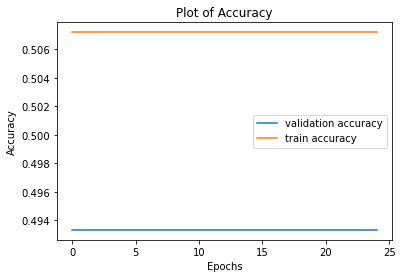

In [18]:
hist = plot_history(h)

In [19]:
# plotting the training accuracy
def plot_history(h):
    
    plt.plot(h.history['val_loss'], label='validation loss')
    plt.plot(h.history['loss'], label='train loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title("Plot of Loss")
    
    

    plt.show()

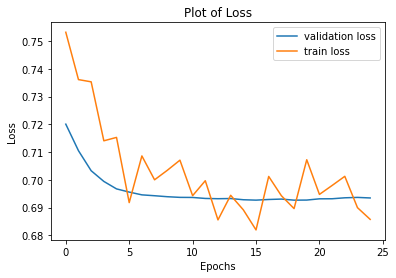

In [20]:
hist = plot_history(h)

In [21]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 3


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(8, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# layer 3 = hidden layer
dnnModel.add(Dense(16, activation = 'relu'))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 24        
                                                                 
 dense_9 (Dense)             (None, 12)                108       
                                                                 
 dense_10 (Dense)            (None, 16)                208       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 357
Trainable params: 357
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 0s 10ms/step - loss: 0.6941 - accuracy: 0.5072 - val_loss: 0.6791 - val_accuracy: 0.4933
Epoch 2/25
11/11 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5072 - val_loss: 0.6851 - val_accuracy: 0.4933
Epoch 3/25
11/11 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5072 - val_loss: 0.6923 - val_accuracy: 0.4933
Epoch 4/25
11/11 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5072 - val_loss: 0.6947 - val_accuracy: 0.4933
Epoch 5/25
11/11 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5072 - val_loss: 0.6977 - val_accuracy: 0.4933
Epoch 6/25
11/11 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.5072 - val_loss: 0.6987 - val_accuracy: 0.4933
Epoch 7/25
11/11 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.5072 - val_loss: 0.6997 - val_accuracy: 0.4933
Epoch 8/25
11/11 [=

In [23]:
# plotting the training accuracy
def plot_history(h):
   
    plt.plot(h.history['val_accuracy'], label='validation accuracy')
    plt.plot(h.history['accuracy'], label='train accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')    
    plt.legend()
    plt.title("Plot of Accuracy")
    
    plt.show()

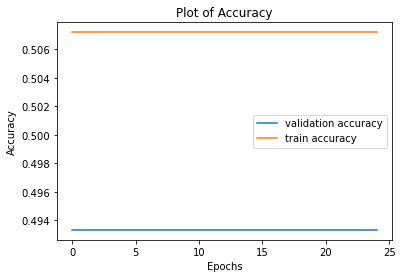

In [24]:
hist = plot_history(h)

In [25]:
# plotting the training accuracy
def plot_history(h):
    
    plt.plot(h.history['val_loss'], label='validation loss')
    plt.plot(h.history['loss'], label='train loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title("Plot of Loss")
    
    

    plt.show()

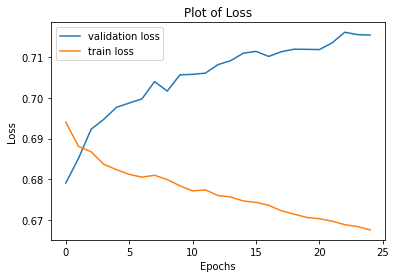

In [26]:
hist = plot_history(h)

In [27]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 4


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(8, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# Add dropout of 25% to layer 2
dnnModel.add(Dropout(0.25))
# layer 3 = hidden layer
dnnModel.add(Dense(16, activation = 'relu'))
# Add dropout of 25% to layer 3
dnnModel.add(Dropout(0.25))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 24        
                                                                 
 dense_13 (Dense)            (None, 12)                108       
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                208       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 357
Trainable params: 357
Non-trainable 

In [28]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 0s 10ms/step - loss: 1.0763 - accuracy: 0.5072 - val_loss: 0.8724 - val_accuracy: 0.4933
Epoch 2/25
11/11 [==============================] - 0s 3ms/step - loss: 0.9883 - accuracy: 0.5072 - val_loss: 0.8125 - val_accuracy: 0.4933
Epoch 3/25
11/11 [==============================] - 0s 3ms/step - loss: 0.8971 - accuracy: 0.5072 - val_loss: 0.7724 - val_accuracy: 0.4933
Epoch 4/25
11/11 [==============================] - 0s 3ms/step - loss: 0.8262 - accuracy: 0.5072 - val_loss: 0.7456 - val_accuracy: 0.4933
Epoch 5/25
11/11 [==============================] - 0s 3ms/step - loss: 0.8255 - accuracy: 0.5072 - val_loss: 0.7286 - val_accuracy: 0.4933
Epoch 6/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7807 - accuracy: 0.5072 - val_loss: 0.7174 - val_accuracy: 0.4933
Epoch 7/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7638 - accuracy: 0.5072 - val_loss: 0.7101 - val_accuracy: 0.4933
Epoch 8/25
11/11 [=

In [29]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 5


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(8, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# Add dropout of 5% to layer 2
dnnModel.add(Dropout(0.5))
# layer 3 = hidden layer
dnnModel.add(Dense(16, activation = 'relu'))
# Add dropout of 5% to layer 3
dnnModel.add(Dropout(0.5))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 8)                 24        
                                                                 
 dense_17 (Dense)            (None, 12)                108       
                                                                 
 dropout_4 (Dropout)         (None, 12)                0         
                                                                 
 dense_18 (Dense)            (None, 16)                208       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 357
Trainable params: 357
Non-trainable 

In [30]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 0s 11ms/step - loss: 0.9725 - accuracy: 0.5072 - val_loss: 0.7921 - val_accuracy: 0.4933
Epoch 2/25
11/11 [==============================] - 0s 3ms/step - loss: 1.0490 - accuracy: 0.5072 - val_loss: 0.7634 - val_accuracy: 0.4933
Epoch 3/25
11/11 [==============================] - 0s 3ms/step - loss: 0.9698 - accuracy: 0.5072 - val_loss: 0.7466 - val_accuracy: 0.4933
Epoch 4/25
11/11 [==============================] - 0s 3ms/step - loss: 0.9109 - accuracy: 0.5072 - val_loss: 0.7345 - val_accuracy: 0.4933
Epoch 5/25
11/11 [==============================] - 0s 3ms/step - loss: 0.9789 - accuracy: 0.5072 - val_loss: 0.7240 - val_accuracy: 0.4933
Epoch 6/25
11/11 [==============================] - 0s 3ms/step - loss: 0.8626 - accuracy: 0.5072 - val_loss: 0.7211 - val_accuracy: 0.4933
Epoch 7/25
11/11 [==============================] - 0s 3ms/step - loss: 0.8072 - accuracy: 0.5072 - val_loss: 0.7181 - val_accuracy: 0.4933
Epoch 8/25
11/11 [=

In [31]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 6


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(16, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# layer 3 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                48        
                                                                 
 dense_21 (Dense)            (None, 12)                204       
                                                                 
 dense_22 (Dense)            (None, 8)                 104       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 0s 10ms/step - loss: 0.9036 - accuracy: 0.5072 - val_loss: 0.7537 - val_accuracy: 0.4933
Epoch 2/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7944 - accuracy: 0.5072 - val_loss: 0.7110 - val_accuracy: 0.4933
Epoch 3/25
11/11 [==============================] - 0s 4ms/step - loss: 0.7344 - accuracy: 0.5072 - val_loss: 0.6968 - val_accuracy: 0.4933
Epoch 4/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7066 - accuracy: 0.5072 - val_loss: 0.6968 - val_accuracy: 0.4933
Epoch 5/25
11/11 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5072 - val_loss: 0.6989 - val_accuracy: 0.4933
Epoch 6/25
11/11 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5072 - val_loss: 0.7016 - val_accuracy: 0.4933
Epoch 7/25
11/11 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.5072 - val_loss: 0.7063 - val_accuracy: 0.4933
Epoch 8/25
11/11 [=

In [33]:
# Splitting the dataset into 70% training and 30% validation data.

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [34]:
Xtrain_shape = Xtrain.shape[1]
print (Xtrain_shape)

2


In [35]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 7


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(16, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# layer 3 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                48        
                                                                 
 dense_25 (Dense)            (None, 12)                204       
                                                                 
 dense_26 (Dense)            (None, 8)                 104       
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 0s 10ms/step - loss: 0.9391 - accuracy: 0.5014 - val_loss: 0.8093 - val_accuracy: 0.5067
Epoch 2/25
11/11 [==============================] - 0s 3ms/step - loss: 0.8179 - accuracy: 0.5014 - val_loss: 0.7233 - val_accuracy: 0.5067
Epoch 3/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7561 - accuracy: 0.5014 - val_loss: 0.6902 - val_accuracy: 0.5067
Epoch 4/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7272 - accuracy: 0.5014 - val_loss: 0.6784 - val_accuracy: 0.5067
Epoch 5/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7116 - accuracy: 0.5014 - val_loss: 0.6758 - val_accuracy: 0.5067
Epoch 6/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7037 - accuracy: 0.5014 - val_loss: 0.6755 - val_accuracy: 0.5067
Epoch 7/25
11/11 [==============================] - 0s 3ms/step - loss: 0.6992 - accuracy: 0.5014 - val_loss: 0.6765 - val_accuracy: 0.5067
Epoch 8/25
11/11 [=

In [37]:
# Splitting the dataset into 70% training and 30% validation data.

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [38]:
Xtrain_shape = Xtrain.shape[1]
print (Xtrain_shape)

2


In [39]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 8


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(16, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# layer 3 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 16)                48        
                                                                 
 dense_29 (Dense)            (None, 12)                204       
                                                                 
 dense_30 (Dense)            (None, 8)                 104       
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 0s 10ms/step - loss: 0.7458 - accuracy: 0.4841 - val_loss: 0.7049 - val_accuracy: 0.5467
Epoch 2/25
11/11 [==============================] - 0s 4ms/step - loss: 0.7193 - accuracy: 0.4841 - val_loss: 0.6932 - val_accuracy: 0.5467
Epoch 3/25
11/11 [==============================] - 0s 4ms/step - loss: 0.7005 - accuracy: 0.4841 - val_loss: 0.6896 - val_accuracy: 0.5467
Epoch 4/25
11/11 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.4841 - val_loss: 0.6915 - val_accuracy: 0.5467
Epoch 5/25
11/11 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.4841 - val_loss: 0.6946 - val_accuracy: 0.5467
Epoch 6/25
11/11 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.4841 - val_loss: 0.6993 - val_accuracy: 0.5467
Epoch 7/25
11/11 [==============================] - 0s 4ms/step - loss: 0.6839 - accuracy: 0.4841 - val_loss: 0.7024 - val_accuracy: 0.5467
Epoch 8/25
11/11 [=

In [41]:
# Splitting the dataset into 70% training and 30% validation data.

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 7)

In [42]:
Xtrain_shape = Xtrain.shape[1]
print (Xtrain_shape)

2


In [43]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 9


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(16, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# layer 3 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 16)                48        
                                                                 
 dense_33 (Dense)            (None, 12)                204       
                                                                 
 dense_34 (Dense)            (None, 8)                 104       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 0s 10ms/step - loss: 0.7016 - accuracy: 0.5014 - val_loss: 0.7010 - val_accuracy: 0.5067
Epoch 2/25
11/11 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5014 - val_loss: 0.6947 - val_accuracy: 0.5067
Epoch 3/25
11/11 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5014 - val_loss: 0.6919 - val_accuracy: 0.5067
Epoch 4/25
11/11 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.5014 - val_loss: 0.6912 - val_accuracy: 0.5067
Epoch 5/25
11/11 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5014 - val_loss: 0.6913 - val_accuracy: 0.5067
Epoch 6/25
11/11 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5014 - val_loss: 0.6904 - val_accuracy: 0.5067
Epoch 7/25
11/11 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.5014 - val_loss: 0.6897 - val_accuracy: 0.5067
Epoch 8/25
11/11 [=

In [45]:
# Splitting the dataset into 70% training and 30% validation data.
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [46]:
Xtrain_shape = Xtrain.shape[1]
print (Xtrain_shape)

2


In [47]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 10


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(12, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(16, activation = 'relu'))
# Add dropout of 50% to layer 2
dnnModel.add(Dropout(0.5))
# layer 3 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# Add dropout of 50% to layer 3
dnnModel.add(Dropout(0.5))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'sigmoid'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 12)                36        
                                                                 
 dense_37 (Dense)            (None, 16)                208       
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_38 (Dense)            (None, 8)                 136       
                                                                 
 dropout_7 (Dropout)         (None, 8)                 0         
                                                                 
 dense_39 (Dense)            (None, 1)                 9         
                                                                 
Total params: 389
Trainable params: 389
Non-trainable 

In [48]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 0s 10ms/step - loss: 0.8529 - accuracy: 0.5274 - val_loss: 0.7367 - val_accuracy: 0.4333
Epoch 2/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7857 - accuracy: 0.5216 - val_loss: 0.7197 - val_accuracy: 0.4667
Epoch 3/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7489 - accuracy: 0.5648 - val_loss: 0.7082 - val_accuracy: 0.5133
Epoch 4/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7486 - accuracy: 0.5101 - val_loss: 0.7007 - val_accuracy: 0.5000
Epoch 5/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7535 - accuracy: 0.5331 - val_loss: 0.6983 - val_accuracy: 0.5200
Epoch 6/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7558 - accuracy: 0.5216 - val_loss: 0.6962 - val_accuracy: 0.5333
Epoch 7/25
11/11 [==============================] - 0s 3ms/step - loss: 0.7293 - accuracy: 0.5043 - val_loss: 0.6948 - val_accuracy: 0.5200
Epoch 8/25
11/11 [=

In [49]:
# Splitting the dataset into 70% training and 30% validation data.
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [50]:
Xtrain_shape = Xtrain.shape[1]
print (Xtrain_shape)

2


In [51]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 11


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(12, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(16, activation = 'relu'))
# Add dropout of 50% to layer 2
dnnModel.add(Dropout(0.5))
# layer 3 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# Add dropout of 50% to layer 3
dnnModel.add(Dropout(0.5))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 12)                36        
                                                                 
 dense_41 (Dense)            (None, 16)                208       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_42 (Dense)            (None, 8)                 136       
                                                                 
 dropout_9 (Dropout)         (None, 8)                 0         
                                                                 
 dense_43 (Dense)            (None, 1)                 9         
                                                                 
Total params: 389
Trainable params: 389
Non-trainable

In [52]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 0s 11ms/step - loss: 1.3226 - accuracy: 0.4841 - val_loss: 0.8497 - val_accuracy: 0.5467
Epoch 2/25
11/11 [==============================] - 0s 3ms/step - loss: 1.4886 - accuracy: 0.4841 - val_loss: 0.7693 - val_accuracy: 0.5467
Epoch 3/25
11/11 [==============================] - 0s 3ms/step - loss: 1.1425 - accuracy: 0.4841 - val_loss: 0.7096 - val_accuracy: 0.5467
Epoch 4/25
11/11 [==============================] - 0s 3ms/step - loss: 1.0183 - accuracy: 0.4841 - val_loss: 0.6911 - val_accuracy: 0.5467
Epoch 5/25
11/11 [==============================] - 0s 3ms/step - loss: 1.0375 - accuracy: 0.4841 - val_loss: 0.6887 - val_accuracy: 0.5467
Epoch 6/25
11/11 [==============================] - 0s 3ms/step - loss: 0.9139 - accuracy: 0.4841 - val_loss: 0.6874 - val_accuracy: 0.5467
Epoch 7/25
11/11 [==============================] - 0s 3ms/step - loss: 0.8454 - accuracy: 0.4841 - val_loss: 0.6872 - val_accuracy: 0.5467
Epoch 8/25
11/11 [=

In [53]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 100,verbose = 1)

Epoch 1/100
11/11 [==============================] - 0s 6ms/step - loss: 0.7191 - accuracy: 0.4841 - val_loss: 0.6905 - val_accuracy: 0.5467
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7156 - accuracy: 0.4841 - val_loss: 0.6913 - val_accuracy: 0.5467
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7166 - accuracy: 0.4841 - val_loss: 0.6920 - val_accuracy: 0.5467
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.4841 - val_loss: 0.6926 - val_accuracy: 0.5467
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4841 - val_loss: 0.6927 - val_accuracy: 0.5467
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7041 - accuracy: 0.4841 - val_loss: 0.6935 - val_accuracy: 0.5467
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7011 - accuracy: 0.4841 - val_loss: 0.6941 - val_accuracy: 0.5467
Epoch 8/100
1

Epoch 59/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.4841 - val_loss: 0.6958 - val_accuracy: 0.5467
Epoch 60/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4841 - val_loss: 0.6956 - val_accuracy: 0.5467
Epoch 61/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.4841 - val_loss: 0.6957 - val_accuracy: 0.5467
Epoch 62/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.4841 - val_loss: 0.6954 - val_accuracy: 0.5467
Epoch 63/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.4841 - val_loss: 0.6951 - val_accuracy: 0.5467
Epoch 64/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.4841 - val_loss: 0.6952 - val_accuracy: 0.5467
Epoch 65/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.4841 - val_loss: 0.6954 - val_accuracy: 0.5467
Epoch 

In [54]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 20,verbose = 1)

Epoch 1/20
11/11 [==============================] - 0s 6ms/step - loss: 0.6828 - accuracy: 0.4841 - val_loss: 0.6935 - val_accuracy: 0.5467
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.4841 - val_loss: 0.6934 - val_accuracy: 0.5467
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.4841 - val_loss: 0.6930 - val_accuracy: 0.5467
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6826 - accuracy: 0.4841 - val_loss: 0.6929 - val_accuracy: 0.5467
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.4841 - val_loss: 0.6932 - val_accuracy: 0.5467
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.4841 - val_loss: 0.6934 - val_accuracy: 0.5467
Epoch 7/20
11/11 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.4841 - val_loss: 0.6935 - val_accuracy: 0.5467
Epoch 8/20
11/11 [==

In [55]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 10,verbose = 1)

Epoch 1/10
11/11 [==============================] - 0s 6ms/step - loss: 0.6843 - accuracy: 0.4841 - val_loss: 0.6926 - val_accuracy: 0.5467
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.4841 - val_loss: 0.6925 - val_accuracy: 0.5467
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6800 - accuracy: 0.4841 - val_loss: 0.6926 - val_accuracy: 0.5467
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.4841 - val_loss: 0.6925 - val_accuracy: 0.5467
Epoch 5/10
11/11 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.4841 - val_loss: 0.6923 - val_accuracy: 0.5467
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.4841 - val_loss: 0.6924 - val_accuracy: 0.5467
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 0.6883 - accuracy: 0.4841 - val_loss: 0.6924 - val_accuracy: 0.5467
Epoch 8/10
11/11 [==

In [56]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 12


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(8, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(16, activation = 'relu'))
# Add dropout of 50% to layer 2
dnnModel.add(Dropout(0.5))
# layer 3 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# Add dropout of 50% to layer 3
dnnModel.add(Dropout(0.5))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 8)                 24        
                                                                 
 dense_45 (Dense)            (None, 16)                144       
                                                                 
 dropout_10 (Dropout)        (None, 16)                0         
                                                                 
 dense_46 (Dense)            (None, 12)                204       
                                                                 
 dropout_11 (Dropout)        (None, 12)                0         
                                                                 
 dense_47 (Dense)            (None, 1)                 13        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable

In [57]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 10,verbose = 1)

Epoch 1/10
11/11 [==============================] - 0s 10ms/step - loss: 0.8187 - accuracy: 0.4841 - val_loss: 0.7419 - val_accuracy: 0.5467
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.7912 - accuracy: 0.4841 - val_loss: 0.7300 - val_accuracy: 0.5467
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.8147 - accuracy: 0.4841 - val_loss: 0.7260 - val_accuracy: 0.5467
Epoch 4/10
11/11 [==============================] - 0s 4ms/step - loss: 0.7755 - accuracy: 0.4841 - val_loss: 0.7236 - val_accuracy: 0.5467
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.7650 - accuracy: 0.4841 - val_loss: 0.7203 - val_accuracy: 0.5467
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.7356 - accuracy: 0.4841 - val_loss: 0.7171 - val_accuracy: 0.5467
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.7489 - accuracy: 0.4841 - val_loss: 0.7143 - val_accuracy: 0.5467
Epoch 8/10
11/11 [=

In [58]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 13


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(4, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# Add dropout of 50% to layer 2
dnnModel.add(Dropout(0.5))
# layer 3 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# Add dropout of 50% to layer 3
dnnModel.add(Dropout(0.5))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 4)                 12        
                                                                 
 dense_49 (Dense)            (None, 12)                60        
                                                                 
 dropout_12 (Dropout)        (None, 12)                0         
                                                                 
 dense_50 (Dense)            (None, 8)                 104       
                                                                 
 dropout_13 (Dropout)        (None, 8)                 0         
                                                                 
 dense_51 (Dense)            (None, 1)                 9         
                                                                 
Total params: 185
Trainable params: 185
Non-trainable

In [59]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 1s 23ms/step - loss: 1.0916 - accuracy: 0.4841 - val_loss: 0.8781 - val_accuracy: 0.5467
Epoch 2/25
11/11 [==============================] - 0s 5ms/step - loss: 0.9880 - accuracy: 0.4841 - val_loss: 0.8287 - val_accuracy: 0.5467
Epoch 3/25
11/11 [==============================] - 0s 5ms/step - loss: 0.9846 - accuracy: 0.4841 - val_loss: 0.7900 - val_accuracy: 0.5467
Epoch 4/25
11/11 [==============================] - 0s 5ms/step - loss: 0.8753 - accuracy: 0.4841 - val_loss: 0.7638 - val_accuracy: 0.5467
Epoch 5/25
11/11 [==============================] - 0s 5ms/step - loss: 0.9857 - accuracy: 0.4841 - val_loss: 0.7422 - val_accuracy: 0.5467
Epoch 6/25
11/11 [==============================] - 0s 4ms/step - loss: 0.9597 - accuracy: 0.4841 - val_loss: 0.7268 - val_accuracy: 0.5467
Epoch 7/25
11/11 [==============================] - 0s 5ms/step - loss: 0.9256 - accuracy: 0.4841 - val_loss: 0.7135 - val_accuracy: 0.5467
Epoch 8/25
11/11 [=

In [60]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 14


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(8, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(4, activation = 'relu'))
# layer 3 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 8)                 24        
                                                                 
 dense_53 (Dense)            (None, 4)                 36        
                                                                 
 dense_54 (Dense)            (None, 12)                60        
                                                                 
 dense_55 (Dense)            (None, 1)                 13        
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 1s 21ms/step - loss: 1.0138 - accuracy: 0.4841 - val_loss: 1.1745 - val_accuracy: 0.5467
Epoch 2/25
11/11 [==============================] - 0s 5ms/step - loss: 0.9547 - accuracy: 0.4841 - val_loss: 1.0976 - val_accuracy: 0.5467
Epoch 3/25
11/11 [==============================] - 0s 4ms/step - loss: 0.9094 - accuracy: 0.4841 - val_loss: 1.0275 - val_accuracy: 0.5467
Epoch 4/25
11/11 [==============================] - 0s 4ms/step - loss: 0.8627 - accuracy: 0.4841 - val_loss: 0.9701 - val_accuracy: 0.5467
Epoch 5/25
11/11 [==============================] - 0s 4ms/step - loss: 0.8261 - accuracy: 0.4841 - val_loss: 0.9166 - val_accuracy: 0.5467
Epoch 6/25
11/11 [==============================] - 0s 6ms/step - loss: 0.7962 - accuracy: 0.4841 - val_loss: 0.8705 - val_accuracy: 0.5467
Epoch 7/25
11/11 [==============================] - 0s 4ms/step - loss: 0.7687 - accuracy: 0.4841 - val_loss: 0.8388 - val_accuracy: 0.5467
Epoch 8/25
11/11 [=

In [62]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 15


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(8, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# layer 3 = hidden layer
dnnModel.add(Dense(4, activation = 'relu'))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 8)                 24        
                                                                 
 dense_57 (Dense)            (None, 12)                108       
                                                                 
 dense_58 (Dense)            (None, 4)                 52        
                                                                 
 dense_59 (Dense)            (None, 1)                 5         
                                                                 
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 1s 21ms/step - loss: 1.0321 - accuracy: 0.4841 - val_loss: 1.0692 - val_accuracy: 0.5467
Epoch 2/25
11/11 [==============================] - 0s 5ms/step - loss: 0.9290 - accuracy: 0.4841 - val_loss: 0.9610 - val_accuracy: 0.5467
Epoch 3/25
11/11 [==============================] - 0s 5ms/step - loss: 0.8507 - accuracy: 0.4841 - val_loss: 0.8738 - val_accuracy: 0.5467
Epoch 4/25
11/11 [==============================] - 0s 6ms/step - loss: 0.7931 - accuracy: 0.4841 - val_loss: 0.8103 - val_accuracy: 0.5467
Epoch 5/25
11/11 [==============================] - 0s 5ms/step - loss: 0.7506 - accuracy: 0.4841 - val_loss: 0.7707 - val_accuracy: 0.5467
Epoch 6/25
11/11 [==============================] - 0s 5ms/step - loss: 0.7272 - accuracy: 0.4841 - val_loss: 0.7433 - val_accuracy: 0.5467
Epoch 7/25
11/11 [==============================] - 0s 5ms/step - loss: 0.7136 - accuracy: 0.4841 - val_loss: 0.7227 - val_accuracy: 0.5467
Epoch 8/25
11/11 [=

In [64]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 16


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(12, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(4, activation = 'relu'))
# layer 3 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 12)                36        
                                                                 
 dense_61 (Dense)            (None, 4)                 52        
                                                                 
 dense_62 (Dense)            (None, 8)                 40        
                                                                 
 dense_63 (Dense)            (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 1s 21ms/step - loss: 1.2835 - accuracy: 0.4841 - val_loss: 1.0314 - val_accuracy: 0.5467
Epoch 2/25
11/11 [==============================] - 0s 6ms/step - loss: 1.1544 - accuracy: 0.4841 - val_loss: 0.9482 - val_accuracy: 0.5467
Epoch 3/25
11/11 [==============================] - 0s 5ms/step - loss: 1.0570 - accuracy: 0.4841 - val_loss: 0.8825 - val_accuracy: 0.5467
Epoch 4/25
11/11 [==============================] - 0s 4ms/step - loss: 0.9731 - accuracy: 0.4841 - val_loss: 0.8354 - val_accuracy: 0.5467
Epoch 5/25
11/11 [==============================] - 0s 4ms/step - loss: 0.9166 - accuracy: 0.4841 - val_loss: 0.7977 - val_accuracy: 0.5467
Epoch 6/25
11/11 [==============================] - 0s 5ms/step - loss: 0.8674 - accuracy: 0.4841 - val_loss: 0.7709 - val_accuracy: 0.5467
Epoch 7/25
11/11 [==============================] - 0s 4ms/step - loss: 0.8318 - accuracy: 0.4841 - val_loss: 0.7502 - val_accuracy: 0.5467
Epoch 8/25
11/11 [=

In [66]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 17


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(12, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# layer 3 = hidden layer
dnnModel.add(Dense(4, activation = 'relu'))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 12)                36        
                                                                 
 dense_65 (Dense)            (None, 8)                 104       
                                                                 
 dense_66 (Dense)            (None, 4)                 36        
                                                                 
 dense_67 (Dense)            (None, 1)                 5         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 1s 21ms/step - loss: 0.7037 - accuracy: 0.4841 - val_loss: 0.7170 - val_accuracy: 0.5467
Epoch 2/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6991 - accuracy: 0.4841 - val_loss: 0.7093 - val_accuracy: 0.5467
Epoch 3/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.4841 - val_loss: 0.7075 - val_accuracy: 0.5467
Epoch 4/25
11/11 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.4841 - val_loss: 0.7044 - val_accuracy: 0.5467
Epoch 5/25
11/11 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.4841 - val_loss: 0.7033 - val_accuracy: 0.5467
Epoch 6/25
11/11 [==============================] - 0s 6ms/step - loss: 0.6897 - accuracy: 0.4841 - val_loss: 0.7015 - val_accuracy: 0.5467
Epoch 7/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6884 - accuracy: 0.4841 - val_loss: 0.6989 - val_accuracy: 0.5467
Epoch 8/25
11/11 [=

In [68]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 18


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(12, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# layer 3 = hidden layer
dnnModel.add(Dense(16, activation = 'relu'))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 12)                36        
                                                                 
 dense_69 (Dense)            (None, 8)                 104       
                                                                 
 dense_70 (Dense)            (None, 16)                144       
                                                                 
 dense_71 (Dense)            (None, 1)                 17        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 1s 22ms/step - loss: 0.7039 - accuracy: 0.4841 - val_loss: 0.7150 - val_accuracy: 0.5467
Epoch 2/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6972 - accuracy: 0.4841 - val_loss: 0.7101 - val_accuracy: 0.5467
Epoch 3/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6946 - accuracy: 0.4841 - val_loss: 0.7063 - val_accuracy: 0.5467
Epoch 4/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.4841 - val_loss: 0.7028 - val_accuracy: 0.5467
Epoch 5/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6908 - accuracy: 0.4841 - val_loss: 0.7038 - val_accuracy: 0.5467
Epoch 6/25
11/11 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.4841 - val_loss: 0.7032 - val_accuracy: 0.5467
Epoch 7/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6883 - accuracy: 0.4841 - val_loss: 0.7008 - val_accuracy: 0.5467
Epoch 8/25
11/11 [=

In [70]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 19


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(16, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# layer 3 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 16)                48        
                                                                 
 dense_73 (Dense)            (None, 8)                 136       
                                                                 
 dense_74 (Dense)            (None, 12)                108       
                                                                 
 dense_75 (Dense)            (None, 1)                 13        
                                                                 
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 1s 22ms/step - loss: 0.7634 - accuracy: 0.4841 - val_loss: 0.6889 - val_accuracy: 0.5467
Epoch 2/25
11/11 [==============================] - 0s 6ms/step - loss: 0.6967 - accuracy: 0.4841 - val_loss: 0.7063 - val_accuracy: 0.5467
Epoch 3/25
11/11 [==============================] - 0s 6ms/step - loss: 0.6990 - accuracy: 0.4841 - val_loss: 0.7165 - val_accuracy: 0.5467
Epoch 4/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.4841 - val_loss: 0.7072 - val_accuracy: 0.5467
Epoch 5/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6891 - accuracy: 0.4841 - val_loss: 0.7026 - val_accuracy: 0.5467
Epoch 6/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6878 - accuracy: 0.4841 - val_loss: 0.6951 - val_accuracy: 0.5467
Epoch 7/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6854 - accuracy: 0.4841 - val_loss: 0.7001 - val_accuracy: 0.5467
Epoch 8/25
11/11 [=

In [72]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 20


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(16, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# layer 3 = hidden layer
dnnModel.add(Dense(12, activation = 'relu'))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'sigmoid'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 16)                48        
                                                                 
 dense_77 (Dense)            (None, 8)                 136       
                                                                 
 dense_78 (Dense)            (None, 12)                108       
                                                                 
 dense_79 (Dense)            (None, 1)                 13        
                                                                 
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 1s 21ms/step - loss: 0.7804 - accuracy: 0.4870 - val_loss: 0.7126 - val_accuracy: 0.4533
Epoch 2/25
11/11 [==============================] - 0s 5ms/step - loss: 0.7189 - accuracy: 0.5072 - val_loss: 0.6864 - val_accuracy: 0.5267
Epoch 3/25
11/11 [==============================] - 0s 5ms/step - loss: 0.7089 - accuracy: 0.5101 - val_loss: 0.6839 - val_accuracy: 0.5400
Epoch 4/25
11/11 [==============================] - 0s 4ms/step - loss: 0.6961 - accuracy: 0.5159 - val_loss: 0.6893 - val_accuracy: 0.5200
Epoch 5/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6878 - accuracy: 0.5216 - val_loss: 0.6967 - val_accuracy: 0.5000
Epoch 6/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6829 - accuracy: 0.5274 - val_loss: 0.6972 - val_accuracy: 0.4800
Epoch 7/25
11/11 [==============================] - 0s 5ms/step - loss: 0.6810 - accuracy: 0.5360 - val_loss: 0.7016 - val_accuracy: 0.4800
Epoch 8/25
11/11 [=

3. Visually observe the dataset and design an appropriate feature transformation (derived feature) such that after feature transformation, the dataset can be classified using a minimal network architecture (minimum number of parameters). Design, train this minimal network, and report training and validation errors, and trained parameters of the network. Use 70% training and 30% validation data, appropriate learning rate, activation and loss functions. Explain the final results. [1+1+0.5 marks]

# Conclusion
### 1. The order of the number of hidden layers does not have an impact on the accuracy
### 2. Activation = 'softmax' for Output Layer performs better than other Activation functions
### 3. Dropout does not have impact on the accuracy
### 4. The validation loss is minimal in Model 11 where Activation = 'softmax' with layers 12-16-8 
### 5. Dropout had no impact on the Accuracy
### 6. High value of "epochs" had lower Accuracy but the Accuracy saturated with at the lower values of "epochs"
### 7. Random state "1" had the best accuracy rate over "0" , "7", "42"

# Model 11 had the Best results

In [74]:
# Splitting the dataset into 70% training and 30% validation data.

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [75]:
Xtrain_shape = Xtrain.shape[1]
print (Xtrain_shape)

2


In [76]:
# Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

# Model 11


dnnModel = Sequential()
# layer 1 = input layer
dnnModel.add(Dense(12, activation = 'relu', input_shape = (Xtrain_shape,)))
# layer 2 = hidden layer
dnnModel.add(Dense(16, activation = 'relu'))
# Add dropout of 50% to layer 2
dnnModel.add(Dropout(0.5))
# layer 3 = hidden layer
dnnModel.add(Dense(8, activation = 'relu'))
# Add dropout of 50% to layer 3
dnnModel.add(Dropout(0.5))
# layer 4 = output layer
dnnModel.add(Dense(1, activation = 'softmax'))
dnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

dnnModel.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 12)                36        
                                                                 
 dense_81 (Dense)            (None, 16)                208       
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 dense_82 (Dense)            (None, 8)                 136       
                                                                 
 dropout_15 (Dropout)        (None, 8)                 0         
                                                                 
 dense_83 (Dense)            (None, 1)                 9         
                                                                 
Total params: 389
Trainable params: 389
Non-trainable

In [77]:
# Trainning the model
h = dnnModel.fit(Xtrain,Ytrain,validation_data = (Xtest, Ytest), epochs = 25,verbose = 1)

Epoch 1/25
11/11 [==============================] - 1s 24ms/step - loss: 1.2861 - accuracy: 0.4841 - val_loss: 1.3374 - val_accuracy: 0.5467
Epoch 2/25
11/11 [==============================] - 0s 6ms/step - loss: 1.2642 - accuracy: 0.4841 - val_loss: 1.1471 - val_accuracy: 0.5467
Epoch 3/25
11/11 [==============================] - 0s 5ms/step - loss: 1.1472 - accuracy: 0.4841 - val_loss: 0.9765 - val_accuracy: 0.5467
Epoch 4/25
11/11 [==============================] - 0s 5ms/step - loss: 0.9671 - accuracy: 0.4841 - val_loss: 0.8717 - val_accuracy: 0.5467
Epoch 5/25
11/11 [==============================] - 0s 4ms/step - loss: 0.9146 - accuracy: 0.4841 - val_loss: 0.7817 - val_accuracy: 0.5467
Epoch 6/25
11/11 [==============================] - 0s 5ms/step - loss: 0.8438 - accuracy: 0.4841 - val_loss: 0.7248 - val_accuracy: 0.5467
Epoch 7/25
11/11 [==============================] - 0s 5ms/step - loss: 0.8360 - accuracy: 0.4841 - val_loss: 0.7039 - val_accuracy: 0.5467
Epoch 8/25
11/11 [=

In [78]:
# plotting the training accuracy
def plot_history(h):
   
    plt.plot(h.history['val_accuracy'], label='validation accuracy')
    plt.plot(h.history['accuracy'], label='train accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')    
    plt.legend()
    plt.title("Plot of Accuracy")
    
    plt.show()

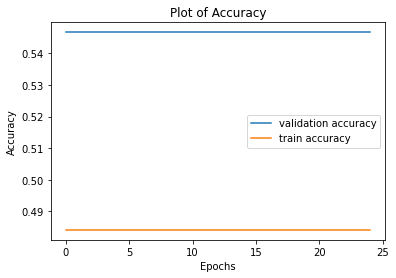

In [79]:
hist = plot_history(h)

In [80]:
# plotting the training accuracy
def plot_history(h):
    
    plt.plot(h.history['val_loss'], label='validation loss')
    plt.plot(h.history['loss'], label='train loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title("Plot of Loss")
    
    

    plt.show()

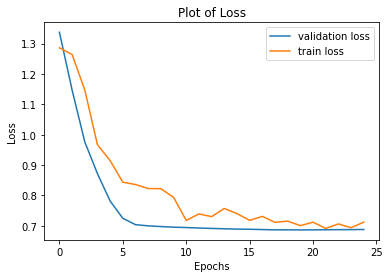

In [81]:
hist = plot_history(h)

In [82]:
# b.Print the description and shape of the dataset.

print("====================== Description of the dataset =======================================")
print(df.describe())
print("====================== Detailed Information of the dataset ==============================")
print(df.info())
print("====================== Shape of the dataset =============================================")
print(df.shape)

====================== Description of the dataset =======================================
        Feature_1   Feature_2  Class_Label
count  497.000000  497.000000   497.000000
mean     0.030889   -0.000024     0.503018
std      5.803289    5.771313     0.500495
min    -13.940352  -13.080541     0.000000
25%     -3.641686   -3.591419     0.000000
50%      0.043100    0.000000     1.000000
75%      3.717234    3.471271     1.000000
max     15.607963   12.880863     1.000000
====================== Detailed Information of the dataset ==============================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Feature_1    497 non-null    float64
 1   Feature_2    497 non-null    float64
 2   Class_Label  497 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB
None
====================== Shape of the dataset ===================

In [86]:
Class_Labels = df.groupby('Class_Label')['Class_Label'].apply(lambda x: x.count()) #defect rates (Fixed/IncorrectlyFixed)
print(' Class_Labels_0 : ' , Class_Labels[0])
print('  Class_Labels_1 : ' , Class_Labels[1])

 Class_Labels_0 :  247
  Class_Labels_1 :  250


In [87]:
# visualization to get an insight about the dataset.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class_Label', ylabel='count'>

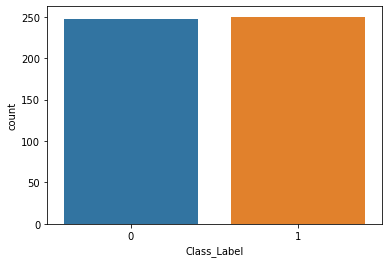

In [89]:
#Visualize the count of labels
sns.countplot(df['Class_Label'], label = 'Class_Labels')

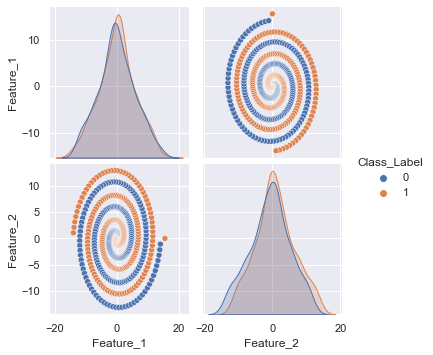

In [90]:
#Create a pair plot
sns.set()
sns.pairplot(df, hue = 'Class_Label')